<center><h1>#2 Group Project Report</h1></center>

<h3><center><strong>Task 1</strong></center></h3>

##### Method 2

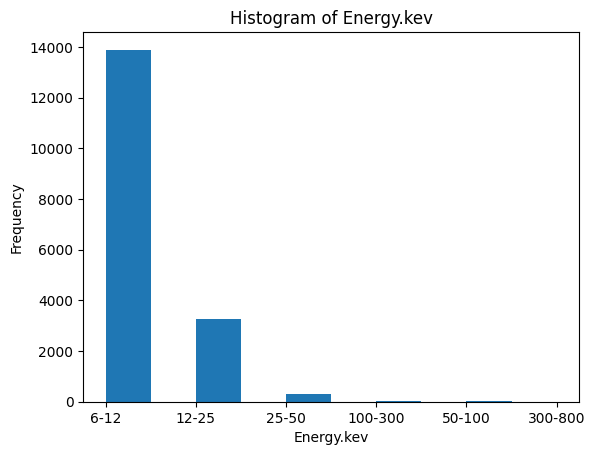

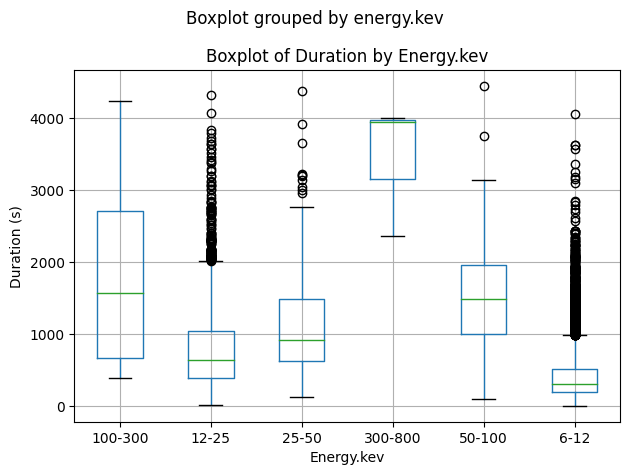

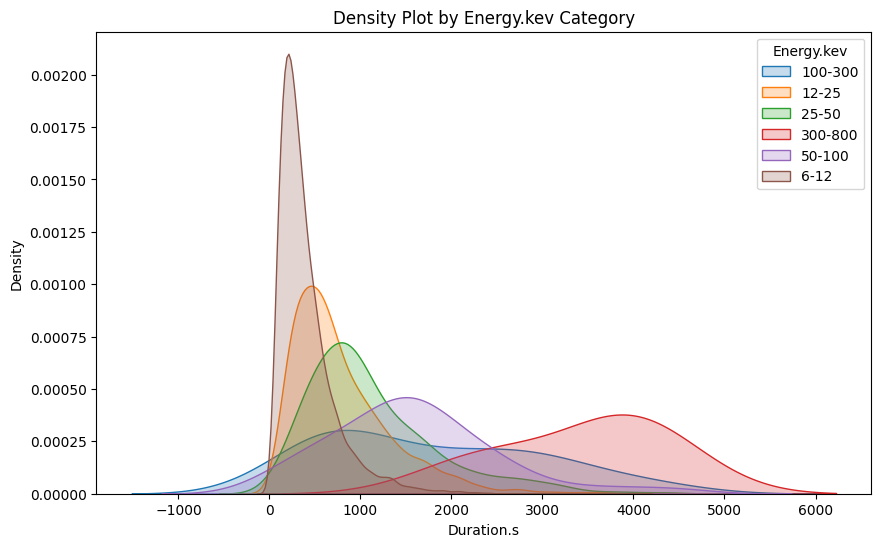

In [16]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#Reading csv file
solar = pd.read_csv("Solar_flare_RHESSI_2004_05.csv")

#Converting energy to a categorical variable
solar['energy.kev'] = solar['energy.kev'].astype('category')

#Create histogram for energy
plt.hist(solar['energy.kev'])
plt.xlabel('Energy.kev')
plt.ylabel('Frequency')
plt.title('Histogram of Energy.kev')


# Create a boxplot
solar.boxplot(column='duration.s', by='energy.kev', vert=True)
plt.xlabel('Energy.kev')
plt.ylabel('Duration (s)')
plt.title('Boxplot of Duration by Energy.kev')
plt.tight_layout()



# Density Plot - Kernel Density Estimation
# Set up the plot
plt.figure(figsize=(10, 6))

# Iterate through each 'energy.kev' category and plot the KDE
for category in solar['energy.kev'].cat.categories:
    subset = solar[solar['energy.kev'] == category]
    sns.kdeplot(subset['duration.s'], label=category, fill=True)

plt.legend(title='Energy.kev')
plt.xlabel('Duration.s')
plt.title('Density Plot by Energy.kev Category')
  
plt.show() 

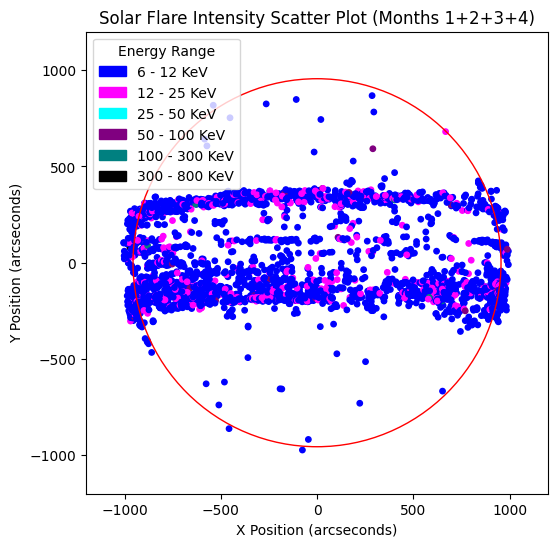

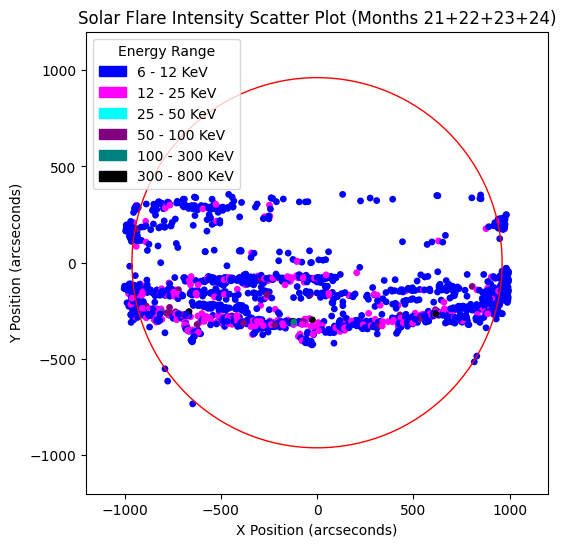

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.colors import ListedColormap
import matplotlib.patches as mpatches

# Load dataset
df = pd.read_csv('Solar_flare_RHESSI_2004_05.csv')

# Filter data for months 1+2+3+4
mask_1to4 = ((df['year'] == 2004) & (df['month'].between(1, 4)))
df_1to4 = df[mask_1to4]

# Filter data for months 21+22+23+24
mask_21to24 = ((df['year'] == 2005) & (df['month'].between(9, 12)))
df_21to24 = df[mask_21to24]

# Create a custom colormap for color-coded energy ranges
cmap = ListedColormap(['blue', 'magenta', 'cyan', 'purple', 'teal', 'black'])

# Define the energy ranges based on energy.kev values
energy_kev_ranges = [(6, 12), (12, 25), (25, 50), (50, 100), (100, 300), (300, 800)]

# Create intensity map for months 1+2+3+4
x_1to4 = df_1to4['x.pos.asec'].values
y_1to4 = df_1to4['y.pos.asec'].values
duration_1to4 = df_1to4['duration.s'].values
energy_kev_1to4 = df_1to4['energy.kev'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2).values

r_1to4 = np.sqrt(x_1to4 ** 2 + y_1to4 ** 2)
t = 80  # percent

r0_1to4 = np.percentile(r_1to4, t)

# Determine the intensity range for each data point based on energy.kev values
intensity_range_1to4 = np.digitize(energy_kev_1to4, [energy_range[1] for energy_range in energy_kev_ranges])

# Create legend items
legend_patches = []
for i, energy_range in enumerate(energy_kev_ranges):
    label = f'{energy_range[0]} - {energy_range[1]} KeV'
    legend_patch = mpatches.Patch(color=cmap(i / len(energy_kev_ranges)), label=label)
    legend_patches.append(legend_patch)

plt.figure(figsize=(15, 10))
sc = plt.scatter(x_1to4, y_1to4, c=intensity_range_1to4, cmap=cmap, s=15)
circle_1to4 = plt.Circle((0, 0), r0_1to4, color='r', fill=False)
plt.gca().add_artist(circle_1to4)
plt.title('Solar Flare Intensity Scatter Plot (Months 1+2+3+4)')
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.xlim(-1200, 1200)
plt.ylim(-1200, 1200)
plt.gca().set_aspect('equal', adjustable='box')

# Add legend
plt.legend(handles=legend_patches, title='Energy Range', loc='upper left')

plt.show()

# Create intensity map for months 21+22+23+24
x_21to24 = df_21to24['x.pos.asec'].values
y_21to24 = df_21to24['y.pos.asec'].values
duration_21to24 = df_21to24['duration.s'].values
energy_kev_21to24 = df_21to24['energy.kev'].apply(lambda x: (int(x.split('-')[0]) + int(x.split('-')[1])) / 2).values

r_21to24 = np.sqrt(x_21to24 ** 2 + y_21to24 ** 2)
t = 80  # percent

r0_21to24 = np.percentile(r_21to24, t)

# Determine the intensity range for each data point based on energy.kev values
intensity_range_21to24 = np.digitize(energy_kev_21to24, [energy_range[1] for energy_range in energy_kev_ranges])

plt.figure(figsize=(15, 10))
sc = plt.scatter(x_21to24, y_21to24, c=intensity_range_21to24, cmap=cmap, s=15)
circle_21to24 = plt.Circle((0, 0), r0_21to24, color='r', fill=False)
plt.gca().add_artist(circle_21to24)
plt.title('Solar Flare Intensity Scatter Plot (Months 21+22+23+24)')
plt.xlabel('X Position (arcseconds)')
plt.ylabel('Y Position (arcseconds)')
plt.xlim(-1200, 1200)
plt.ylim(-1200, 1200)
plt.gca().set_aspect('equal', adjustable='box')

# Add legend
plt.legend(handles=legend_patches, title='Energy Range', loc='upper left')
plt.show()
